# Videogame Sales and Reviews Report

In [1]:
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from ipywidgets import interact, interactive, fixed, interact_manual

from bokeh.plotting import figure, show  
import pandas as pd

# Data and Statistics

<p><em>Below is a sample of the data we will be using for the report.<p>
<p>We will also go ahead and set up the dataframe for use in the charts below.<p>

In [2]:
videogames = pd.read_csv('VideoGames.csv')
df = pd.DataFrame(videogames)
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Best Selling Genre

<p><em>First it is important to know which genres the gaming community enjoys playing the most.<p>
<p>As we can see more intense genres like Action, Sports, and Shooters create the highest selling genres.<p>

Text(0, 0.5, 'Total Sales $')

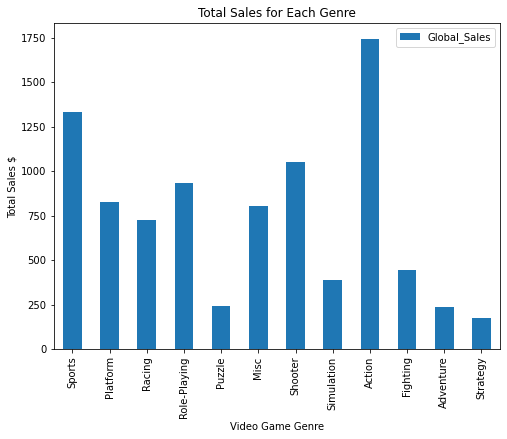

In [3]:
genre_sales = df.groupby('Genre', sort=False)['Global_Sales'].sum().reset_index()
bar_chart = genre_sales.plot.bar(x='Genre', title='Total Sales for Each Genre', figsize=(8,6))
bar_chart.set_xlabel('Video Game Genre')
bar_chart.set_ylabel('Total Sales $')

# Regional Sales

<p><em>Now we move on to showing a comparison of the sales by region.<p>
<p>The result shows that western countries make up a little over 75% of videogame sales.<p>

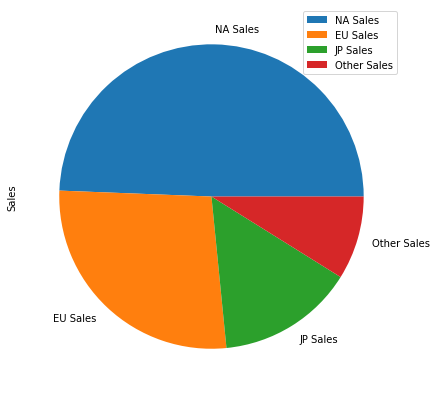

In [4]:
na = pd.Series(df['NA_Sales']).sum()
eu = pd.Series(df['EU_Sales']).sum()
jp = pd.Series(df['JP_Sales']).sum()
other = pd.Series(df['Other_Sales']).sum()
pie_df = pd.DataFrame({'Sales': [na, eu, jp, other]}, index=['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'])
pie_chart = pie_df.plot.pie(y='Sales', figsize=(7,7))

# Comparing Reviews to Player Counts

<p><em>Here we provide an analsysis to help understand the correlation between player counts and critic scores.<br>
    Of course a higher review means more players, but how often is this the case?<br>
    As show by the scatter plot, most games do not reach above a thousand players, regardless of reviews,<br>
    but having a higher critic score does increase the chances.<br> 
    Reaching a player count above five thousand seems to only be capable from games that have at least a seventy rating or above.<br>
    The user can also select to see the charts by global sales, vs play scores. To see how high the sales are for some of the most played games, and infer a correlation between the two.<p>

In [43]:
score = df['Critic_Score']
score2 = df['Global_Sales']
player_count= df['User_Count']
x = score
y= player_count

@interact_manual
def interactive_scores(Select = ['Critic Score', 'User Score']):
    if Select == 'Critic Score':
        x = score
        plt.figure(figsize=(10,10))
        plt.xlabel('Critic Score')
        plt.ylabel('User Count')
        return plt.scatter(x, y, s = 10)
    elif Select == 'User Score':
        x = score2
        plt.figure(figsize=(10,10))
        plt.xlabel('Global Sales')
        plt.ylabel('User Count')
        return plt.scatter(x, y, s = 10)
    return

interactive(children=(Dropdown(description='Select', options=('Critic Score', 'User Score'), value='Critic Sco…

# Running Algorithms

<p><em>This is where we will use machine learning to find trends in the data.<br>
    We are looking for correlations in what we believe would be the most influential factors such as<br>
    critic scores, game genre, and game rating. We have also provided a heatmap to show correlation between the data.<br>
    The algorithms are provided below and they are overlapped to show the close correlation of the two.<br>
    One uses the critic score and genre, and the other uses the critic score and rating. It will show the linear comparison of having a higher critic score, and its correlation with the ratings/genres of a game.<p>

<AxesSubplot:>

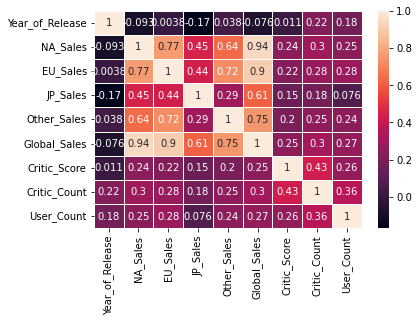

In [40]:
sns.heatmap(df.corr(),annot=True,lw=1)

<AxesSubplot:xlabel='Global_Sales'>

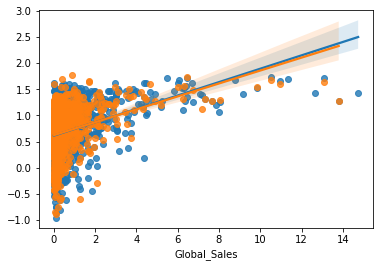

In [37]:
grab_data = df[['Rating', 'Critic_Score', 'Global_Sales']].dropna()
y1 = grab_data.drop(['Rating', 'Critic_Score'], axis = 1)
x1 = grab_data.drop('Global_Sales', axis=1)
x1 = pd.get_dummies(data=x1, drop_first=True)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)
rat_cri_regr = LinearRegression()
rat_cri_regr.fit(x1_train,y1_train)
pred1 = rat_cri_regr.predict(x1_test)


grab_data2 = df[['Genre', 'Critic_Score','Global_Sales']].dropna()
y2 = grab_data2.drop(['Genre', 'Critic_Score'], axis = 1)
x2 = grab_data2.drop('Global_Sales', axis=1)
x2 = pd.get_dummies(data=x2, drop_first=True)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.1, random_state = 42)
gen_cri_regr = LinearRegression()
gen_cri_regr.fit(x2_train,y2_train)
pred2 = gen_cri_regr.predict(x2_test)

sns.regplot(x = y1_test,y = pred1)
sns.regplot(x = y2_test,y = pred2)
